[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guilbera/colorizing/blob/main/notebooks/keras_implementation//pix_keras.ipynb)

In [1]:
import numpy as np
import tensorflow as tf
from PIL import Image
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install kora -q
  from kora import drive
  drive.link_nbs()

     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
Mounted at /content/drive


In [3]:
from pix import rgb_to_lab

importing Jupyter notebook from /nbs/pix.ipynb


In [4]:
def make_dataloaders(batch_size=16, im_size=256, val_split= 0.725, split = 'Train', path = '/content/dataset/'):
    if split == 'Train':
        # if training, augment the data
        datagen = ImageDataGenerator(
            rescale = 1/255.,
            shear_range=0.2,
            zoom_range=0.2,
            rotation_range=20,
            horizontal_flip=True,
            validation_split=val_split)
        # import from a directory with subdirectory 'Train', can split for validation
        generator = datagen.flow_from_directory(
            path,
            target_size=(im_size, im_size),
            color_mode='rgb',
            batch_size = batch_size,
            classes = [split],
            subset = 'training',
            class_mode='input',
            shuffle=True)
    elif split == 'Test':
        # no data augmentation, just rescale the image to 0-1
        datagen = ImageDataGenerator(
            rescale = 1/255.,
            )
        # import from a directory with subdirectory 'Test', no shuffle
        generator = datagen.flow_from_directory(
            path,
            target_size=(im_size, im_size),
            color_mode='rgb',
            batch_size = batch_size,
            classes = [split],
            class_mode='input',
            shuffle=False)
    return generator

### **Example on how to use the generator**

In [5]:
run_example = True

fatal: destination path 'colorizing' already exists and is not an empty directory.
Found 9294 images belonging to 1 classes.


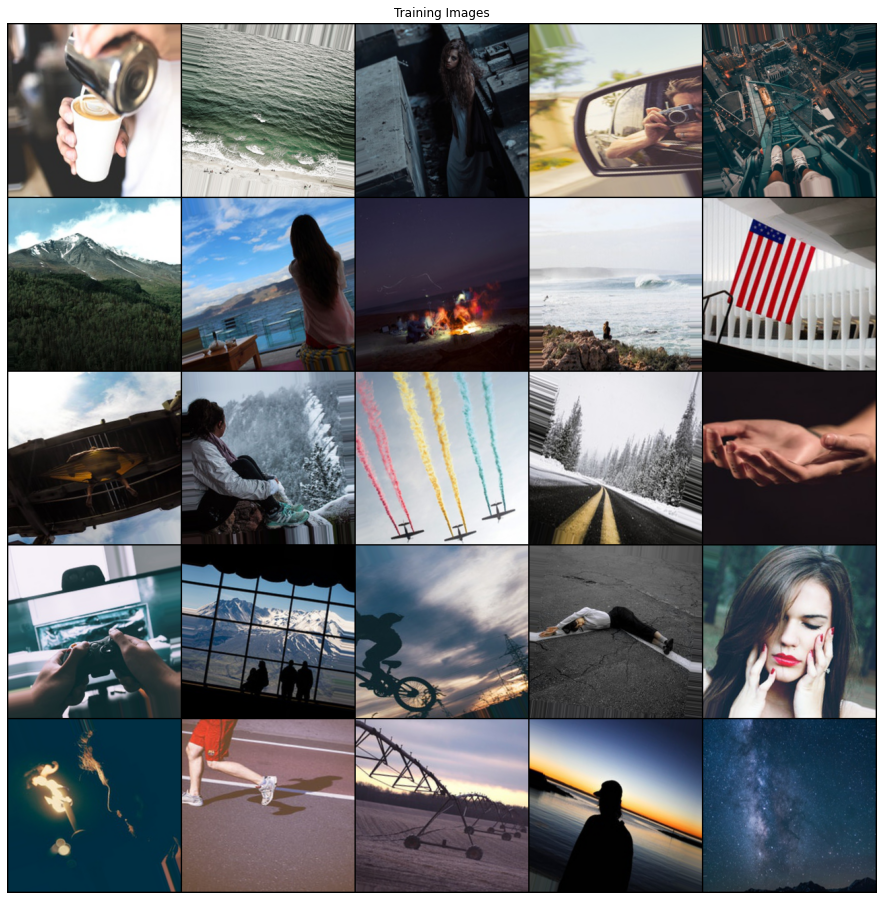

In [7]:
if 'google.colab' in str(get_ipython()) and run_example:
  import os
  import torch
  import matplotlib.pyplot as plt
  import torchvision.utils as vutils
  from shutil import copy
  from pix import copy_dataset, rgb_to_lab

  #copy the relevant notebooks
  !git clone https://github.com/guilbera/colorizing.git
  copy(os.path.join('/content/colorizing/notebooks/utilities/pix.ipynb'), '/content/drive/MyDrive/Colab Notebooks/')
  for nbs in os.listdir('/content/colorizing/notebooks/keras_implementation/'):
    copy(os.path.join('/content/colorizing/notebooks/keras_implementation/', nbs), '/content/drive/MyDrive/Colab Notebooks/')

  #copy the dataset to google drive
  if not os.path.exists('/content/drive/MyDrive/datasets/'):
    !mkdir '/content/drive/MyDrive/datasets/'
    %cd '/content/drive/My Drive/datasets/'
    !gdown --id '1hNXR_qPwNKS-z3xNQJ4fWlEWe-zES_nX'
    %cd '/content/'

  copy_dataset('/content/drive/MyDrive/datasets/dataset_1.zip')
  generator = make_dataloaders(batch_size=25, im_size=256, val_split=0, split='Train', path='/content/dataset/dataset_1/')
  color_grid = vutils.make_grid(torch.from_numpy(next(iter(generator))[0]).permute(0,3,1,2), padding=2, normalize=True, nrow=5).cpu()
  
  plt.figure(figsize=(16,16))
  plt.axis("off")
  plt.title("Training Images")
  plt.imshow(np.transpose(color_grid,(1,2,0)))